In [369]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from mpl_toolkits.mplot3d import axes3d, Axes3D

In [618]:
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler, Normalizer 
from sklearn.manifold import TSNE
from scipy.cluster.hierarchy import linkage, dendrogram

### Loading Data 

In [371]:
df_dv=pd.read_csv('/Users/dasha/Documents/Capstone_2_files/Data Cleaning/Clean Data Frame.csv')
df_dv.head()

,Title,Achievement/Effort_Importance,Active Learning_Importance,Active Listening_Importance,Adaptability/Flexibility_Importance,Administration and Management_Importance,Analytical Thinking_Importance,Analyzing Data or Information_Importance,Arm-Hand Steadiness_Importance,Artistic_Occupational Interests,...,Work With Work Group or Team_Context_,Work With Work Group or Team_Context_1.0,Work With Work Group or Team_Context_2.0,Work With Work Group or Team_Context_3.0,Work With Work Group or Team_Context_4.0,Work With Work Group or Team_Context_5.0,Wrist-Finger Speed_Importance,Writing_Importance,Written Comprehension_Importance,Written Expression_Importance
0,Accountants,3.63,3.12,3.88,3.78,3.11,4.21,3.93,1.38,1.00,...,3.66,16.3,17.37,6.01,4.52,55.81,1.38,3.62,4.00,3.75
1,Actors,4.73,2.62,3.75,4.78,2.56,3.25,1.78,2.00,6.67,...,5.00,0.0,0.00,0.00,0.00,100.00,1.12,2.88,3.88,2.88
2,Actuaries,4.44,3.38,4.00,3.81,3.31,4.81,4.88,1.12,1.67,...,3.97,0.0,6.45,19.35,45.16,29.03,1.25,3.38,4.00,3.75
3,Acupuncturists,3.65,3.12,3.75,3.81,2.67,3.95,3.06,3.12,2.33,...,3.56,13.6,3.14,29.95,20.79,32.53,1.38,3.25,3.50,3.25
4,Acute Care Nurses,4.25,3.75,4.00,4.71,2.89,4.11,3.48,1.75,2.00,...,4.77,0.0,0.00,3.85,15.38,80.77,1.38,3.50,4.00,3.75


### Scaling data 

In [372]:
array=df_dv.drop(columns='Title').values
std_sc=StandardScaler()
array=std_sc.fit_transform(array)

### Dimensionality Reduction 

523


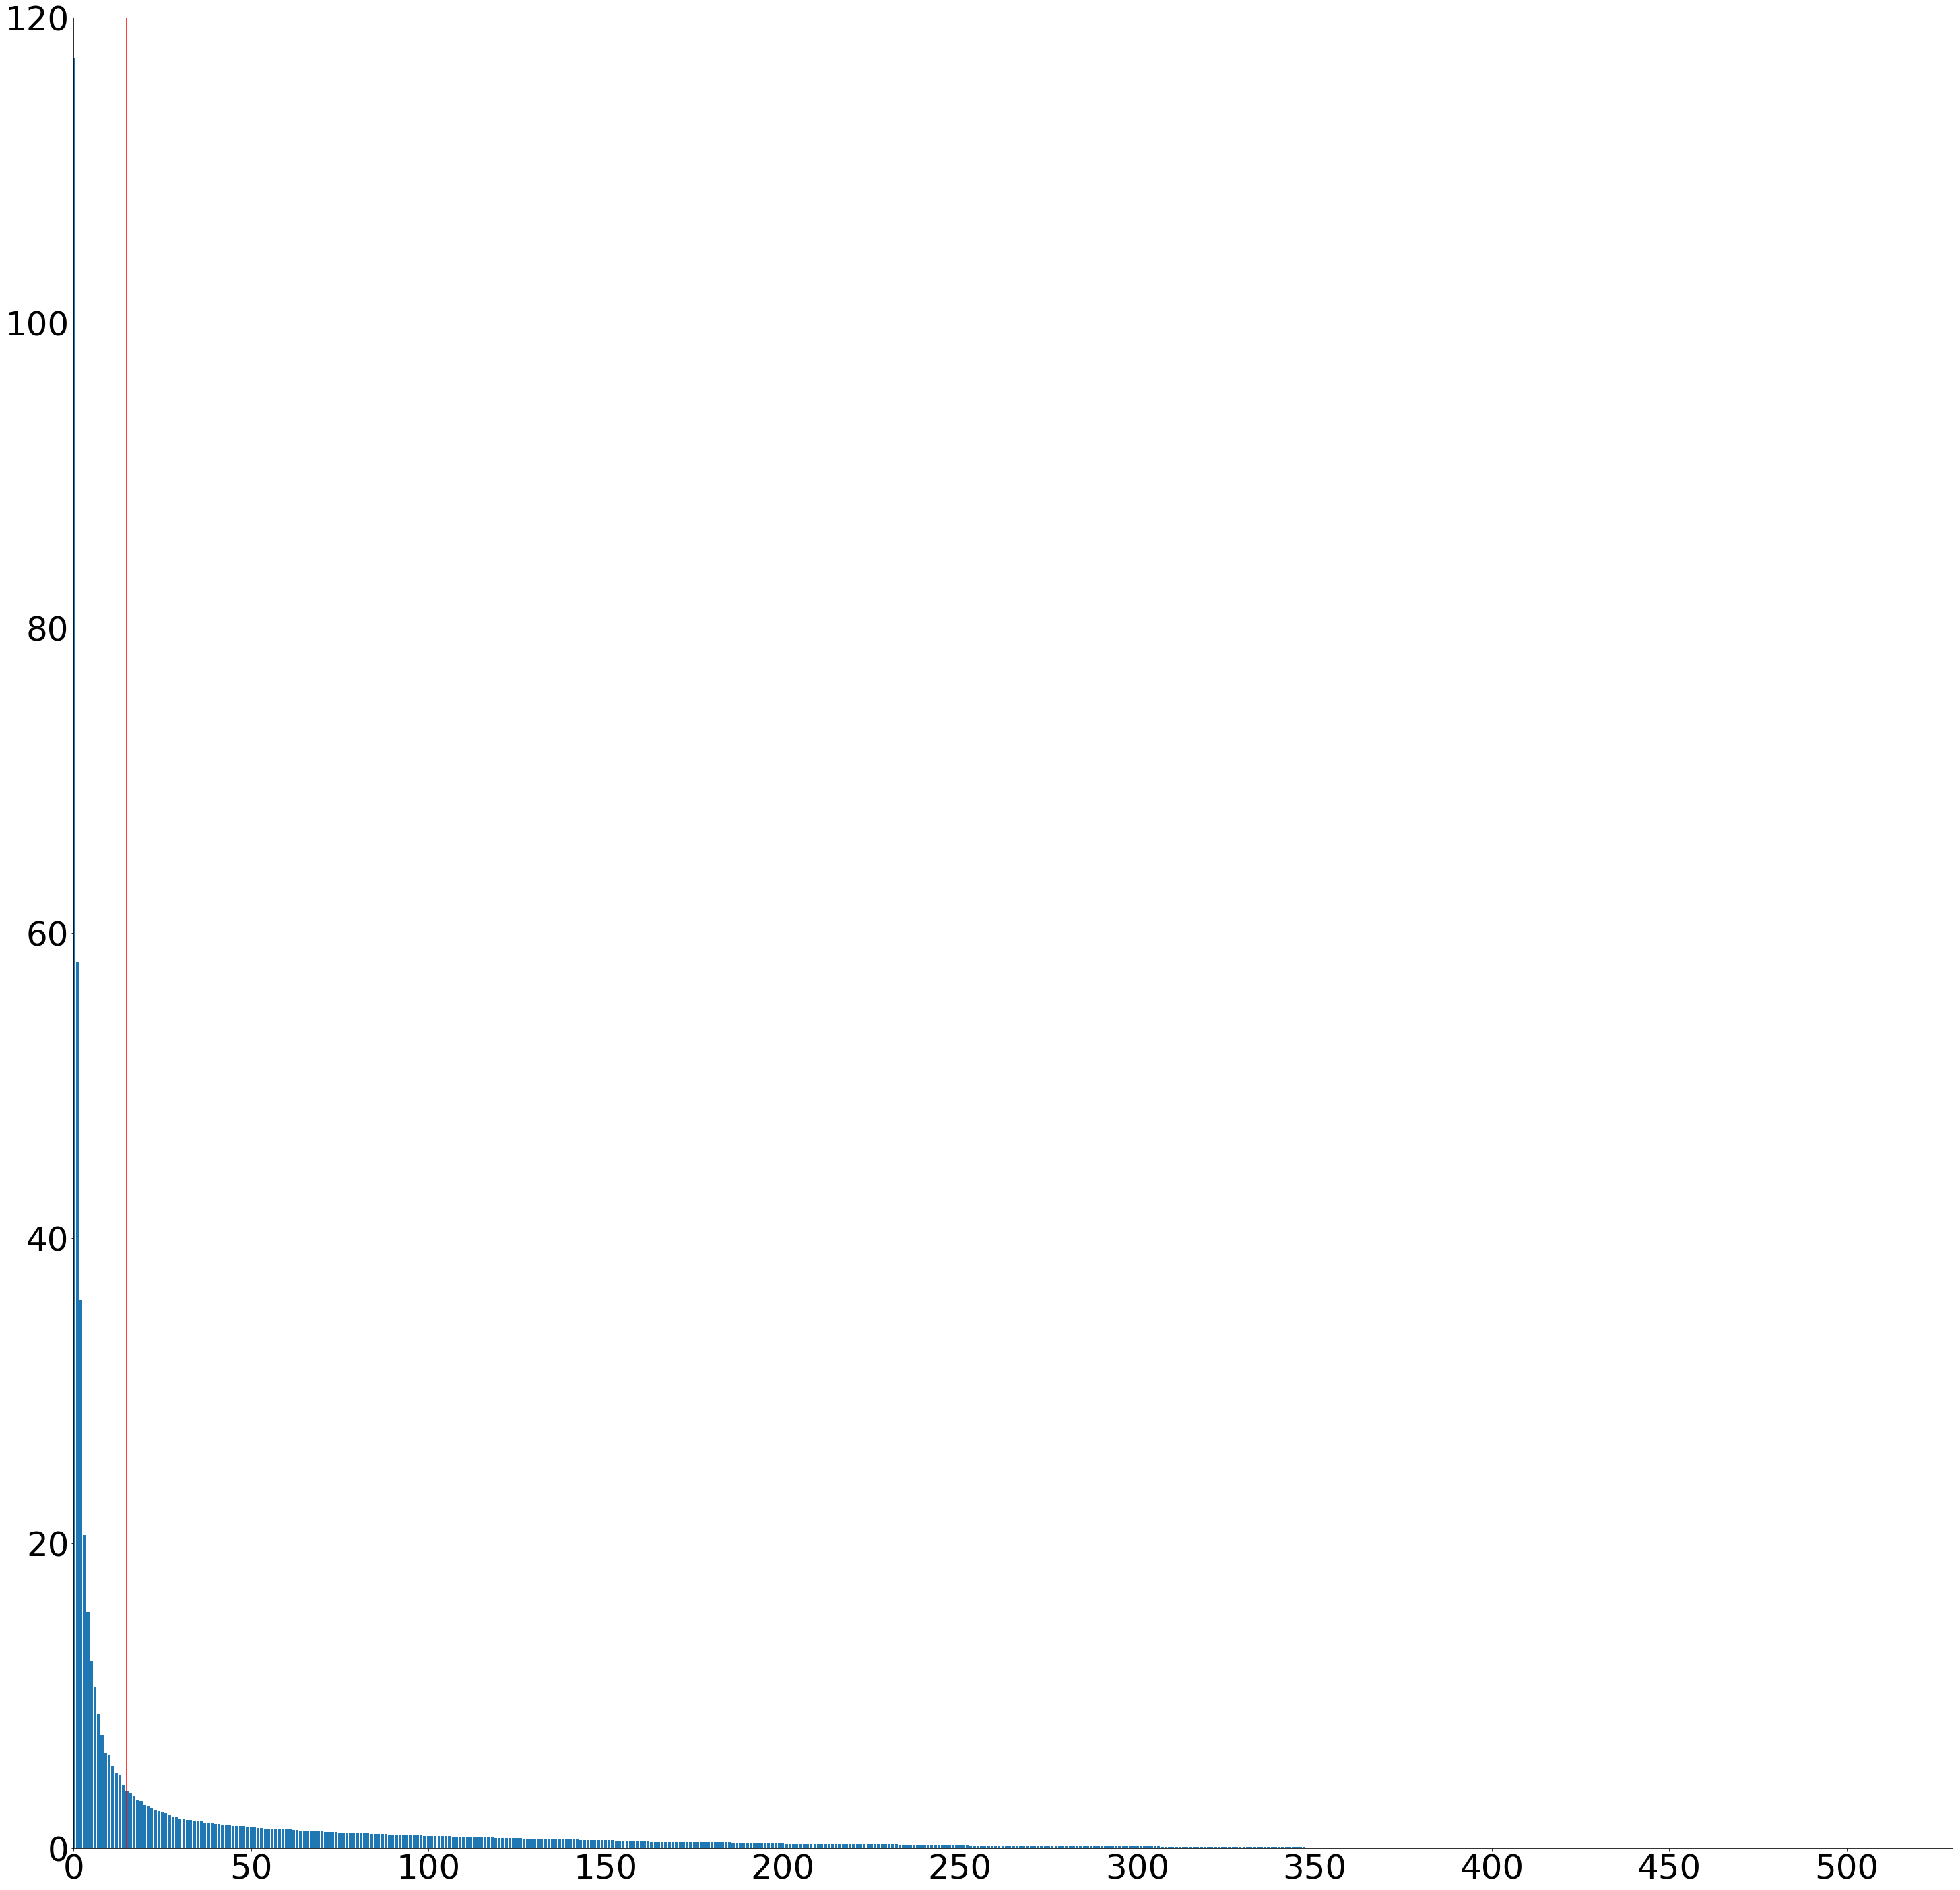

In [373]:
pca=PCA()
model_p=pca.fit(array)
n=np.arange(model_p.n_components_)
print(len(n))
plt.figure(figsize=(50,50))
plt.bar(n,model_p.explained_variance_)
plt.xlim(0,530)
plt.ylim(0,120)
plt.xticks(np.arange(0,530,step=50),fontsize=50)
plt.yticks(fontsize=50)
plt.axvline(15,color='red')

The cut-off point was chosen to be around 15. 

In [374]:
mpca=PCA(n_components=15)
dim_red_array=mpca.fit_transform(array)

### KMeans Clustering 

Making the 'Elbow' graph to determine the approximate amount of clusters 

(array([-5.,  0.,  5., 10., 15., 20., 25., 30., 35.]),
 <a list of 9 Text xticklabel objects>)

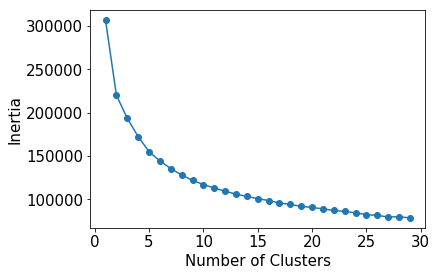

In [375]:
k_range=range(1,30)
inertias=[]
for k in k_range: 
    km=KMeans(n_clusters=k)
    km.fit(dim_red_array)
    inertia=km.inertia_
    inertias.append(inertia)

plt.plot(k_range,inertias,marker='o')
plt.xlabel('Number of Clusters',fontsize=15)
plt.ylabel('Inertia',fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)

Fitting the model and creating the labled table 

In [589]:
km_model=KMeans(n_clusters=8,random_state=42)
km_model.fit(dim_red_array)
km_pred=km_model.labels_

In [590]:
df_pca_km=pd.DataFrame({'Title':df_dv['Title'],'Cluster_ID':km_pred,'x':dim_red_array[:,0],'y':dim_red_array[:,1],'z':dim_red_array[:,2]})
color_dict={0:'red',1:'yellow',2:'blue',3:'green',4:'black',5:'purple',6:'orange',7:'brown',8:'cyan'}
color_list_km=['red','yellow','blue','green','black','purple','orange','brown']
df_pca_km['Color_id']=df_pca_km['Cluster_ID'].map(color_dict)

In [591]:
df_pca_km.head(30)

,Title,Cluster_ID,x,y,z,Color_id
0,Accountants,0,-11.829214,6.975581,-2.551898,red
1,Actors,7,-1.337573,5.751665,1.763261,brown
2,Actuaries,0,-14.821287,4.890699,-9.137109,red
3,Acupuncturists,7,-4.930002,5.620680,4.474648,brown
4,Acute Care Nurses,1,-5.529933,-5.901460,15.769548,yellow
5,Adapted Physical Education Specialists,3,-3.144753,-3.386586,6.959326,green
6,Adhesive Bonding Machine Operators and Tenders,6,15.336740,2.903626,2.159783,orange
7,"Administrative Law Judges, Adjudicators, and H...",3,-12.718860,2.742626,6.620391,green
8,Administrative Services Managers,3,-7.809963,-3.579552,2.328639,green
9,Adult Basic and Secondary Education and Litera...,3,-9.850115,6.345585,1.427478,green


Old fashioned scatterplot 

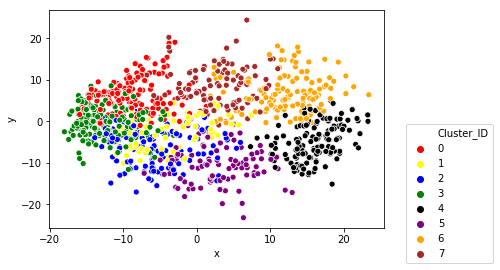

In [592]:
sns.scatterplot(x='x',y='y',hue='Cluster_ID',data=df_pca_km,palette=color_list_km)
plt.legend(bbox_to_anchor=(1.05,.5),prop={'size':10})

3D visualization of the clusters 

Text(0.5,0,'x')

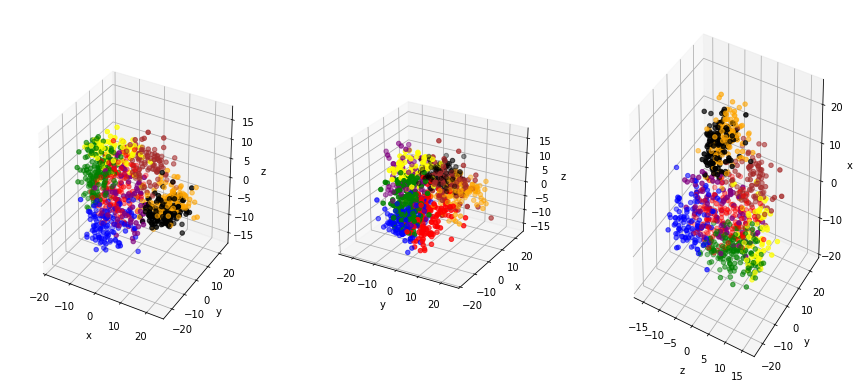

In [603]:
fig=plt.figure(figsize=(15,15))
fig.tight_layout()
ax1= fig.add_subplot(131, projection='3d',aspect='equal',adjustable='box')
ax2 = fig.add_subplot(132, projection='3d',aspect='equal',adjustable='box')
ax3 = fig.add_subplot(133, projection='3d',aspect='equal',adjustable='box')
ax1.scatter(xs=df_pca_km['x'],ys=df_pca_km['y'],zs=df_pca_km['z'],color=df_pca_km['Color_id'])
ax2.scatter(ys=df_pca_km['x'],xs=df_pca_km['y'],zs=df_pca_km['z'],color=df_pca_km['Color_id'])
ax3.scatter(zs=df_pca_km['x'],ys=df_pca_km['y'],xs=df_pca_km['z'],color=df_pca_km['Color_id'])
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z')
ax2.set_xlabel('y')
ax2.set_ylabel('x')
ax2.set_zlabel('z')
ax3.set_xlabel('z')
ax3.set_ylabel('y')
ax3.set_zlabel('x')

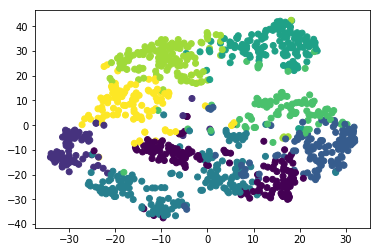

In [601]:
tsne=TSNE(learning_rate=100)
tsne_feat=tsne.fit_transform(dim_red_array)
xs = tsne_feat[:,0]
ys = tsne_feat[:,1]
plt.scatter(xs,ys,c=km_pred)

### DBSCAN

In [451]:
db_model=DBSCAN(eps=9,min_samples=15)
db_model.fit(dim_red_array)
db_pred=db_model.labels_

In [452]:
df_pca_db=pd.DataFrame({'Title':df_dv['Title'],'Cluster_ID':db_pred,'x':dim_red_array[:,0],'y':dim_red_array[:,1],'z':dim_red_array[:,2]})
df_pca_db.head(30)

,Title,Cluster_ID,x,y,z
0,Accountants,1,-11.829214,6.975581,-2.551898
1,Actors,-1,-1.337573,5.751665,1.763261
2,Actuaries,1,-14.821287,4.890699,-9.137109
3,Acupuncturists,-1,-4.930002,5.620680,4.474648
4,Acute Care Nurses,3,-5.529933,-5.901460,15.769548
5,Adapted Physical Education Specialists,-1,-3.144753,-3.386586,6.959326
6,Adhesive Bonding Machine Operators and Tenders,0,15.336740,2.903626,2.159783
7,"Administrative Law Judges, Adjudicators, and H...",1,-12.718860,2.742626,6.620391
8,Administrative Services Managers,1,-7.809963,-3.579552,2.328639
9,Adult Basic and Secondary Education and Litera...,2,-9.850115,6.345585,1.427478


In [474]:
print(df_pca_db['Cluster_ID'].nunique())
df_pca_db['Cluster_ID'].unique()

7


array([ 1, -1,  3,  0,  2,  5,  4])

In [463]:
color_dict_db={-1:'red',0:'yellow',1:'blue',2:'green',3:'black',4:'purple',5:'orange'}
color_list_db=['red','yellow','blue','green','black','purple','orange']
df_pca_db['Color_id']=df_pca_db['Cluster_ID'].map(color_dict_db)
df_pca_db.head(30)

,Title,Cluster_ID,x,y,z,Color_id
0,Accountants,1,-11.829214,6.975581,-2.551898,blue
1,Actors,-1,-1.337573,5.751665,1.763261,red
2,Actuaries,1,-14.821287,4.890699,-9.137109,blue
3,Acupuncturists,-1,-4.930002,5.620680,4.474648,red
4,Acute Care Nurses,3,-5.529933,-5.901460,15.769548,black
5,Adapted Physical Education Specialists,-1,-3.144753,-3.386586,6.959326,red
6,Adhesive Bonding Machine Operators and Tenders,0,15.336740,2.903626,2.159783,yellow
7,"Administrative Law Judges, Adjudicators, and H...",1,-12.718860,2.742626,6.620391,blue
8,Administrative Services Managers,1,-7.809963,-3.579552,2.328639,blue
9,Adult Basic and Secondary Education and Litera...,2,-9.850115,6.345585,1.427478,green


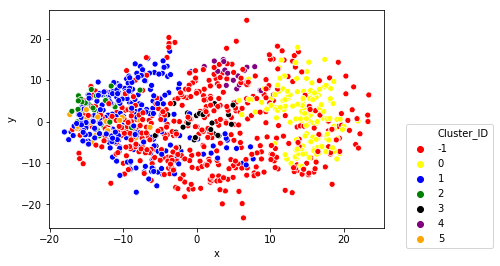

In [465]:
sns.scatterplot(x='x',y='y',hue='Cluster_ID',data=df_pca_db,palette=color_list_db)
plt.legend(bbox_to_anchor=(1.05,.5),prop={'size':10})

Text(0.5,0,'x')

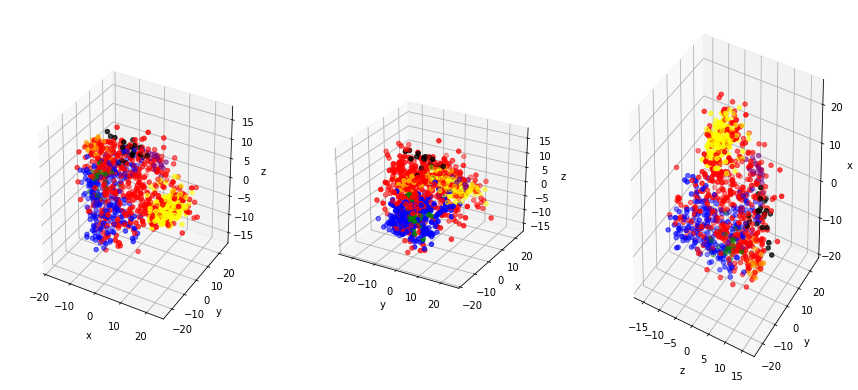

In [604]:
fig=plt.figure(figsize=(15,15))
fig.tight_layout()
ax1= fig.add_subplot(131, projection='3d',aspect='equal',adjustable='box')
ax2 = fig.add_subplot(132, projection='3d',aspect='equal',adjustable='box')
ax3 = fig.add_subplot(133, projection='3d',aspect='equal',adjustable='box')
ax1.scatter(xs=df_pca_db['x'],ys=df_pca_db['y'],zs=df_pca_db['z'],color=df_pca_db['Color_id'])
ax2.scatter(ys=df_pca_db['x'],xs=df_pca_db['y'],zs=df_pca_db['z'],color=df_pca_db['Color_id'])
ax3.scatter(zs=df_pca_db['x'],ys=df_pca_db['y'],xs=df_pca_db['z'],color=df_pca_db['Color_id'])
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z')
ax2.set_xlabel('y')
ax2.set_ylabel('x')
ax2.set_zlabel('z')
ax3.set_xlabel('z')
ax3.set_ylabel('y')
ax3.set_zlabel('x')

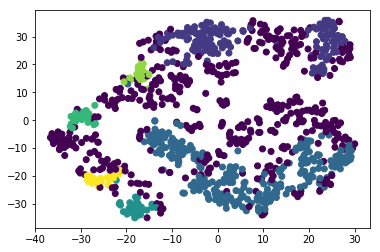

In [602]:
tsne=TSNE(learning_rate=100)
tsne_feat=tsne.fit_transform(dim_red_array)
xs = tsne_feat[:,0]
ys = tsne_feat[:,1]
plt.scatter(xs,ys,c=db_pred)

### Hierarchial Clustering 

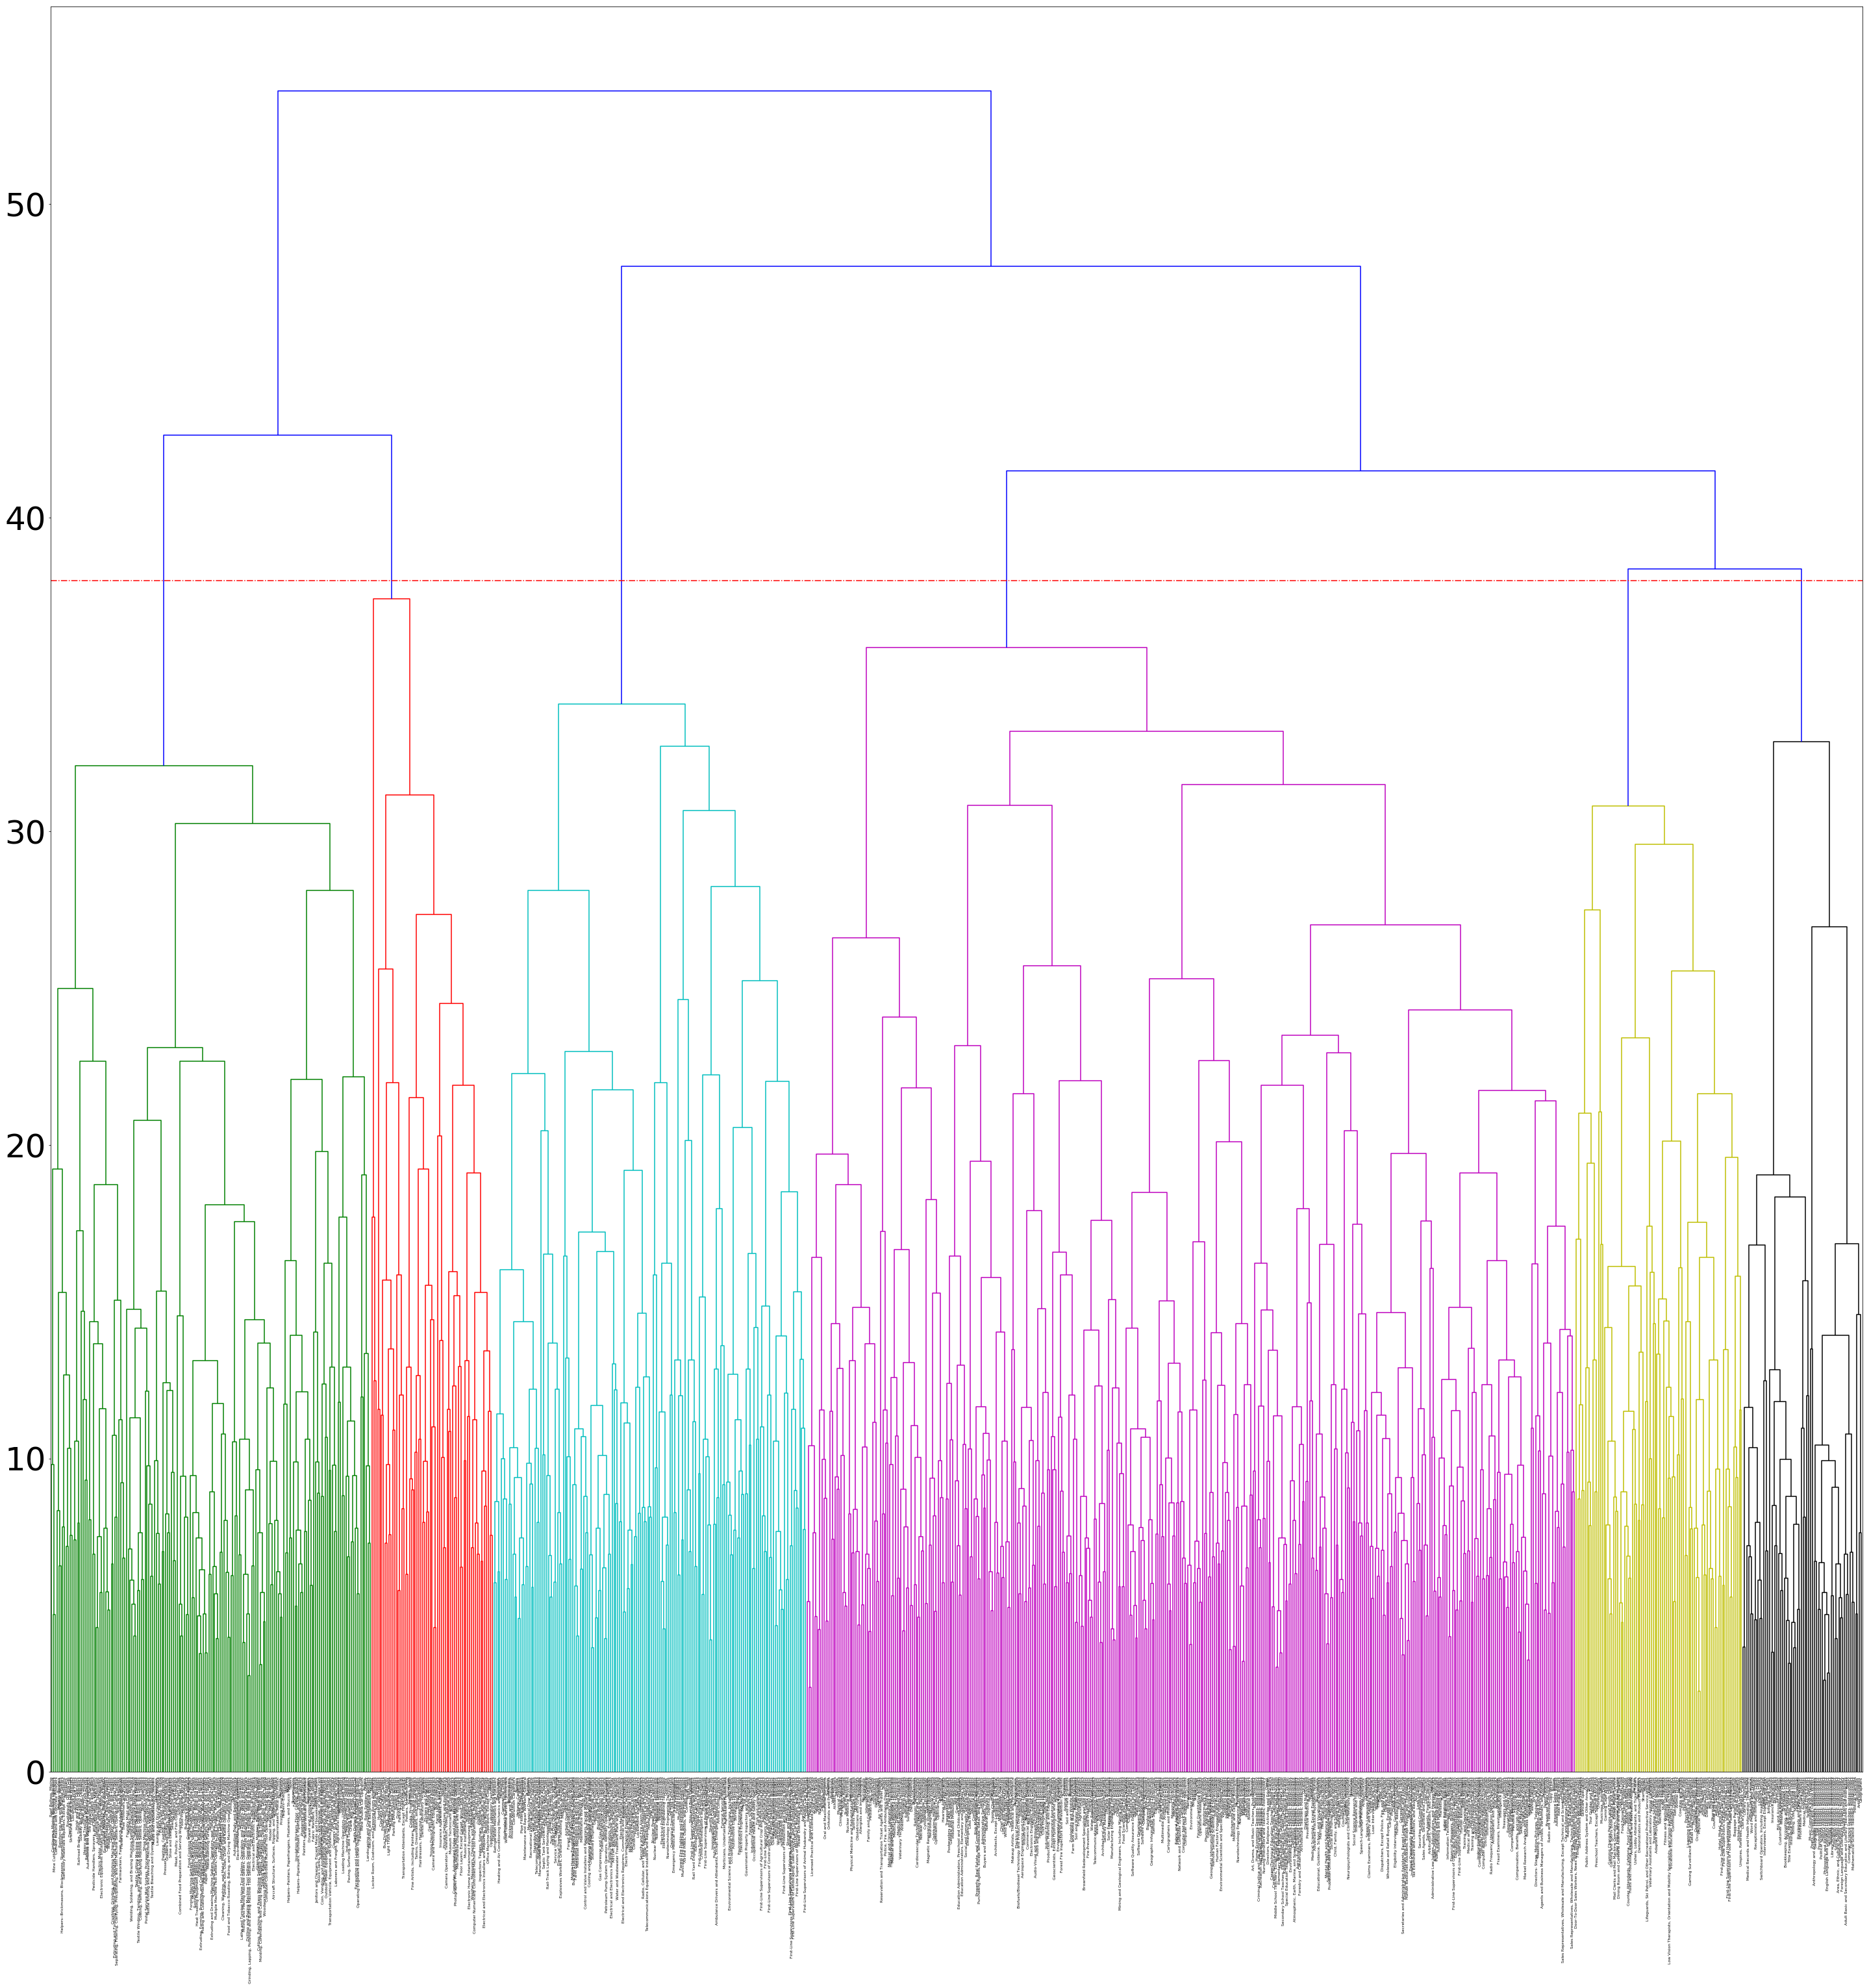

In [625]:
merge = linkage(dim_red_array,method='complete')
figure=plt.figure(figsize=(50,50)) 
dendrogram(merge,labels=list(df_dv['Title']),leaf_rotation=90,leaf_font_size=6)
plt.yticks(fontsize=50)
plt.axhline(38,color='red',linestyle='-.')
plt.show()

In [620]:
ag_model=AgglomerativeClustering(n_clusters=6)
ag_model.fit(dim_red_array)
ag_pred=ag_model.labels_

In [621]:
df_pca_ag=pd.DataFrame({'Title':df_dv['Title'],'Cluster_ID':ag_pred,'x':dim_red_array[:,0],'y':dim_red_array[:,1],'z':dim_red_array[:,2]})
color_dict={0:'red',1:'yellow',2:'blue',3:'green',4:'black',5:'purple',6:'orange',7:'brown',8:'cyan'}
color_list_ag=['red','yellow','blue','green','black','purple']
df_pca_ag['Color_id']=df_pca_ag['Cluster_ID'].map(color_dict)

In [622]:
df_pca_ag.head(30)

,Title,Cluster_ID,x,y,z,Color_id
0,Accountants,5,-11.829214,6.975581,-2.551898,purple
1,Actors,0,-1.337573,5.751665,1.763261,red
2,Actuaries,5,-14.821287,4.890699,-9.137109,purple
3,Acupuncturists,1,-4.930002,5.620680,4.474648,yellow
4,Acute Care Nurses,2,-5.529933,-5.901460,15.769548,blue
5,Adapted Physical Education Specialists,1,-3.144753,-3.386586,6.959326,yellow
6,Adhesive Bonding Machine Operators and Tenders,0,15.336740,2.903626,2.159783,red
7,"Administrative Law Judges, Adjudicators, and H...",1,-12.718860,2.742626,6.620391,yellow
8,Administrative Services Managers,2,-7.809963,-3.579552,2.328639,blue
9,Adult Basic and Secondary Education and Litera...,1,-9.850115,6.345585,1.427478,yellow


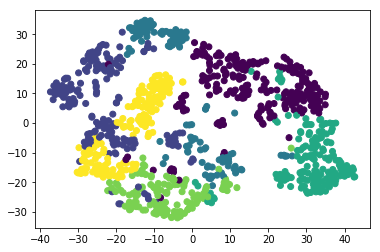

In [623]:
tsne=TSNE(learning_rate=100)
tsne_feat=tsne.fit_transform(dim_red_array)
xs = tsne_feat[:,0]
ys = tsne_feat[:,1]
plt.scatter(xs,ys,c=ag_pred)